In [1]:
import pandas as pd 

In [109]:
df = pd.read_csv(r"C:\Users\arshi\Downloads\archive (69)\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is NO missing data

In [111]:
df = df.drop(columns=['customerID'],axis=1)

In [16]:
df.shape

(7043, 20)

In [27]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

**there is some imbalance in the data**

In [21]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [36]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [44]:
df.groupby(['gender','Churn']).count()

SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
gender Churn                                                             
Female No              2549     2549        2549    2549          2549   
       Yes              939      939         939     939           939   
Male   No              2625     2625        2625    2625          2625   
       Yes              930      930         930     930           930   

              MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
gender Churn                                                                 
Female No              2549             2549            2549          2549   
       Yes              939              939             939           939   
Male   No              2625             2625            2625          2625   
       Yes              930              930             930           930   

              DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
gender Churn                                                                
Female No                 2549         2549         2549             2549   
       Yes                 939          939          939              939   
Male   No                 2625         2625         2625             2625   
       Yes                 930          930          930              930   

              Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
gender Churn                                                              
Female No         2549              2549           2549            2549   
       Yes         939               939            939             939   
Male   No         2625              2625           2625            2625   
       Yes         930               930            930             930   

              TotalCharges  
gender Churn                
Female No             2549  
       Yes             939  
Male   No             2625  
       Yes             930

**The chance for male and Female customer churn is almost same** 

In [46]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

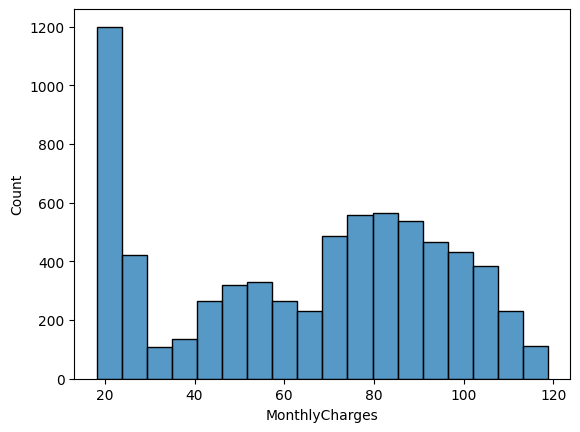

In [49]:
sns.histplot(df['MonthlyCharges'])

In [93]:
df[df['TotalCharges']==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [119]:
import numpy as np

In [121]:
df['TotalCharges'] = df['TotalCharges'].map(lambda x : np.nan if x==" " else x )

In [123]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [125]:
df.dropna(axis=0,inplace=True)

In [127]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**There is null value in the TotalCharges column which is marked as " ", but it is only 11 data so droped the null value because it will not effect**

In [130]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [54]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [138]:
cat_col = []
for col in df.columns:
    
    if df[col].dtype == "O":
        print(df[col].value_counts())
        print()
        cat_col.append(col)
        
# df['Churn'].dtype

gender
Male      3549
Female    3483
Name: count, dtype: int64

Partner
No     3639
Yes    3393
Name: count, dtype: int64

Dependents
No     4933
Yes    2099
Name: count, dtype: int64

PhoneService
Yes    6352
No      680
Name: count, dtype: int64

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64

TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64

StreamingTV
No                 

<Axes: xlabel='Churn', ylabel='count'>

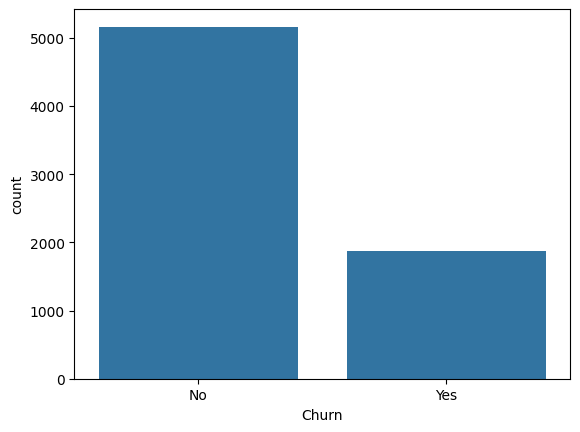

In [136]:
sns.countplot(data=df,x='Churn')

**We can clearly see the imbalance in the data, so do Oversampling technique like SMOTE to overcome the problem**

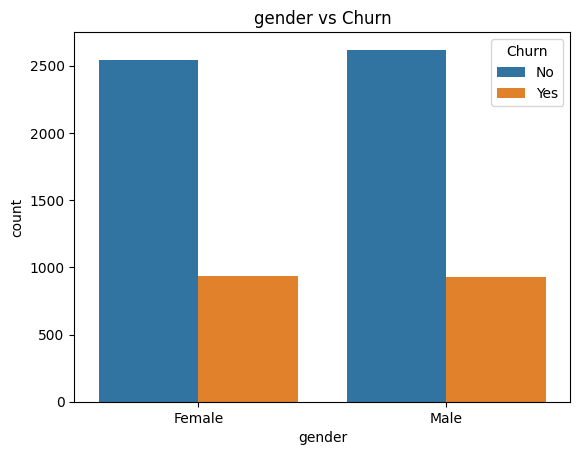

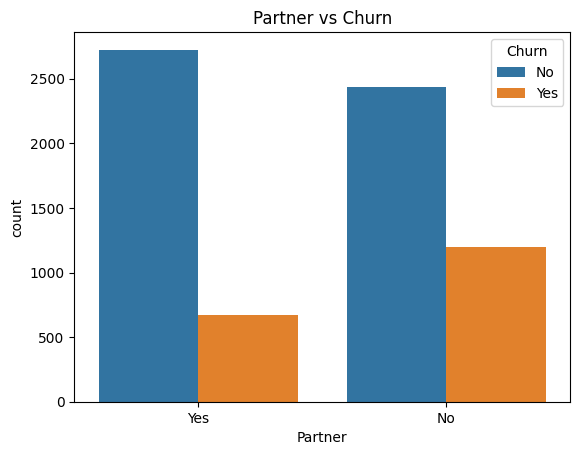

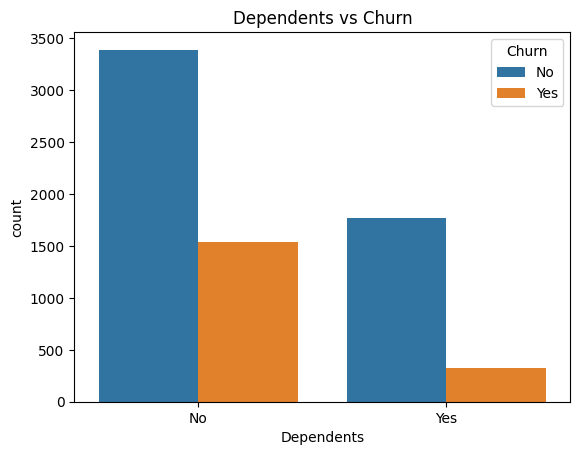

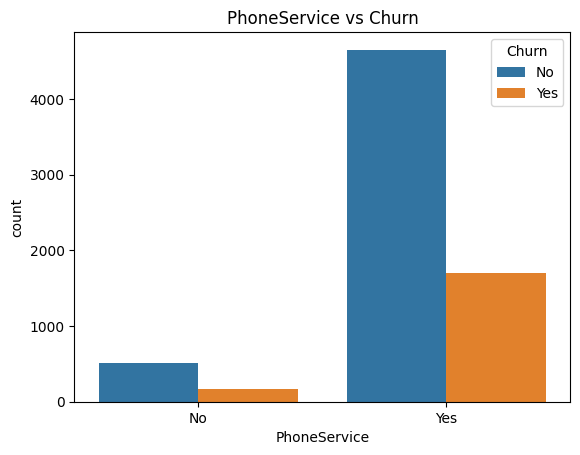

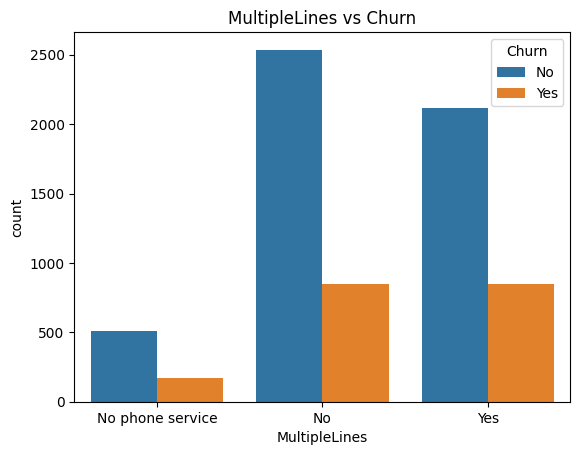

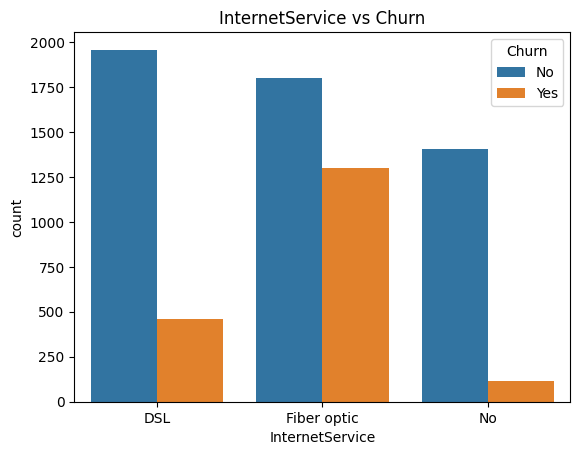

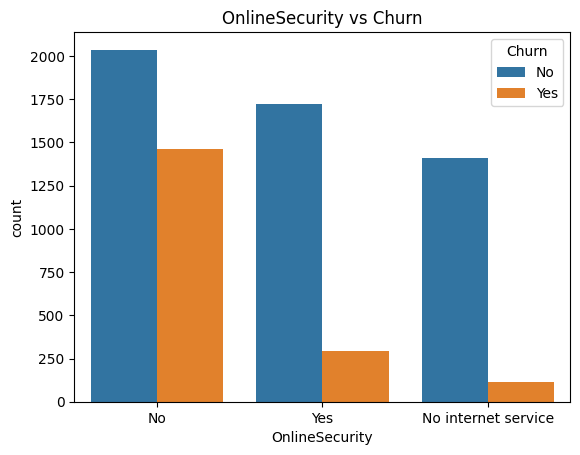

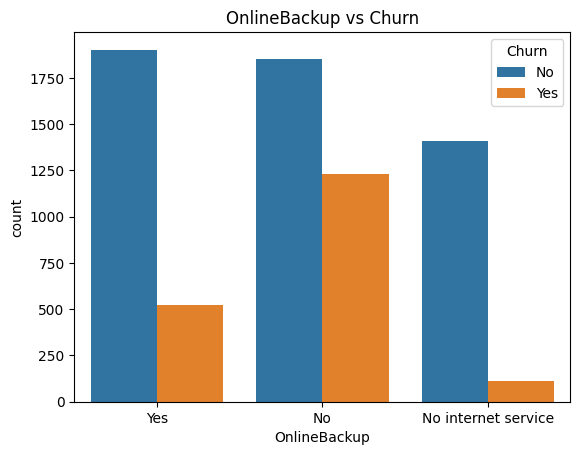

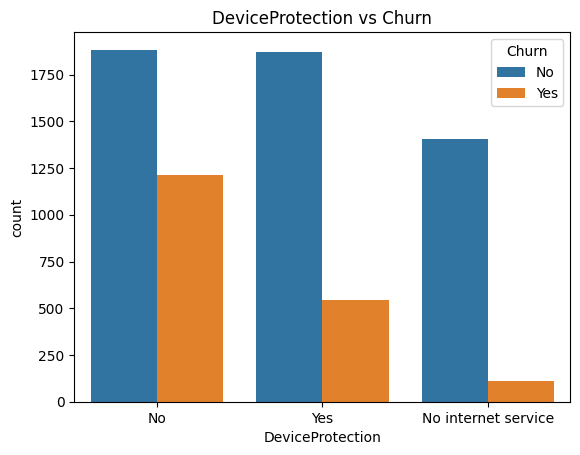

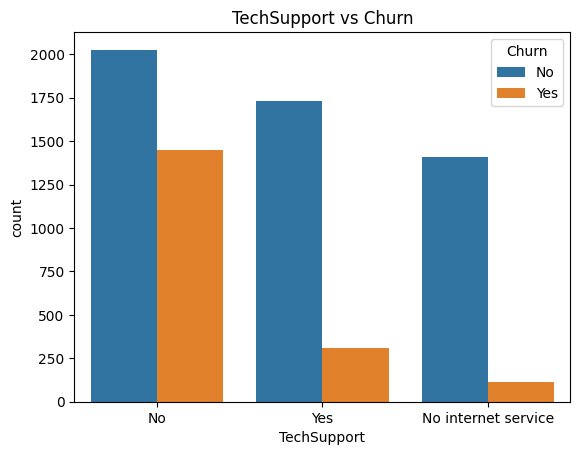

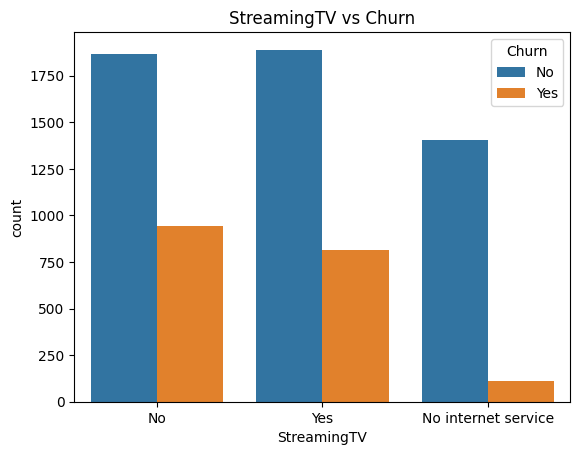

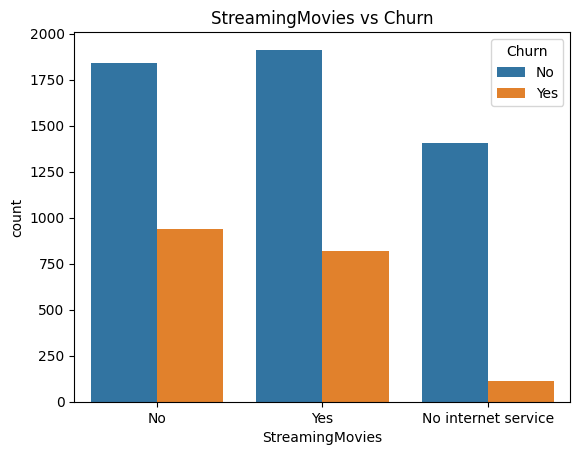

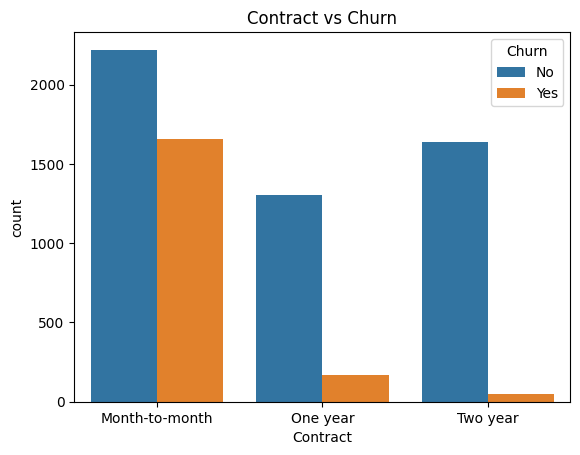

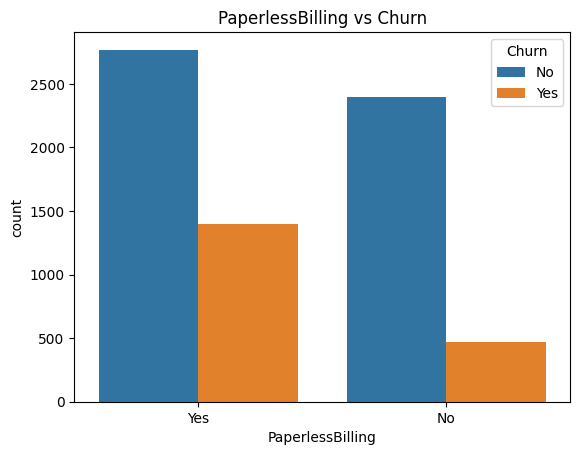

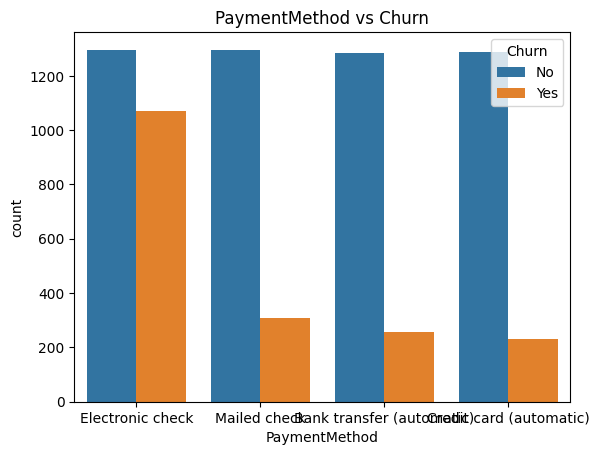

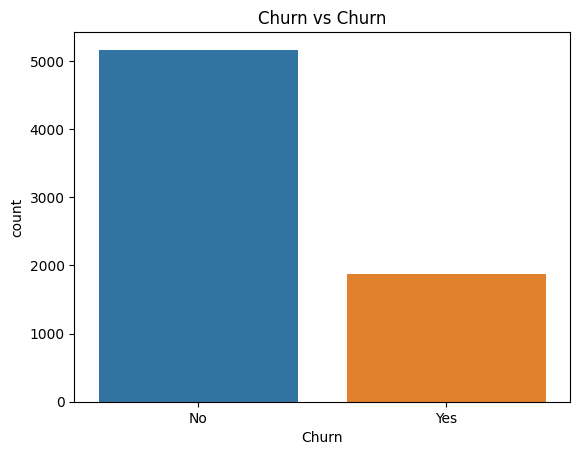

In [140]:
for col in cat_col:
    sns.countplot(data = df,x=col,hue='Churn')
    plt.title(f"{col} vs Churn")
    plt.show()

In [142]:
num_col = [col for col in df.columns if col not in cat_col]

In [144]:
num_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

<Axes: >

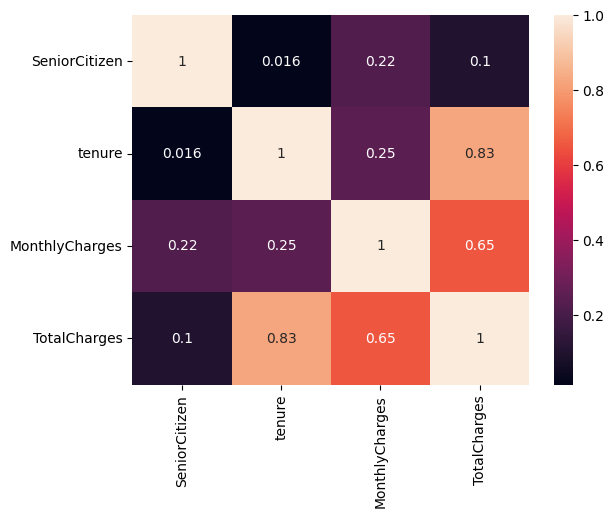

In [146]:
sns.heatmap(df[num_col].corr(),annot=True)

**We can see that there is a slight relation ship between SeniorCitizen and tenure, but it will not effect too much on the model performance
there is a small relation between MonthlyCharge and TotalCharge**

<Axes: xlabel='Churn', ylabel='tenure'>

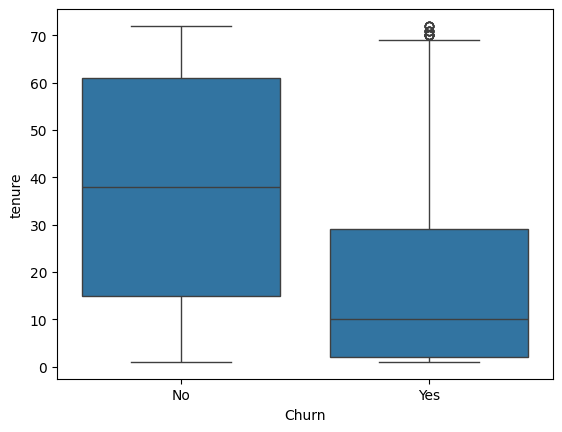

In [149]:
sns.boxplot(data =df,x="Churn",y="tenure")

In [163]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [155]:
for col in cat_col:
    if col != "Churn": 
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [157]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes


In [159]:
df['Churn'] = df['Churn'].map(lambda x : 0 if x=="No" else 1)

In [161]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [165]:
X = df.drop(["Churn"],axis=1)
y = df['Churn']

In [170]:
scaler = StandardScaler()

In [172]:
X_scaled = scaler.fit_transform(X)

In [174]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)


In [178]:
model1 = RandomForestClassifier(n_estimators=50)
model1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [182]:
y_pred = model1.predict(X_test)

In [184]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.63      0.47      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.77      2110



** overcomming the imbalance**

In [187]:
from imblearn.over_sampling import SMOTE

In [189]:
over_sampling = SMOTE(k_neighbors=5,random_state=4)

In [193]:
X_resample,y_resample = over_sampling.fit_resample(X,y)

In [197]:
X_resample.shape

(10326, 19)

In [199]:
scaler2 = StandardScaler()
X_resample_scaled = scaler2.fit_transform(X_resample)

In [209]:
X_train,X_test,y_train,y_test = train_test_split(X_resample_scaled,y_resample,test_size=0.3,random_state=42)

In [211]:
model2 = RandomForestClassifier(n_estimators=50)
model2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [213]:
y_pred = model1.predict(X_test)

In [215]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.94      0.76      1563
           1       0.88      0.44      0.58      1535

    accuracy                           0.69      3098
   macro avg       0.76      0.69      0.67      3098
weighted avg       0.75      0.69      0.67      3098



In [217]:
model3 = SVC()

In [219]:
model3.fit(X_train,y_train)

SVC()

In [221]:
y_pred3 = model3.predict(X_test)

In [234]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1563
           1       0.82      0.83      0.82      1535

    accuracy                           0.82      3098
   macro avg       0.82      0.82      0.82      3098
weighted avg       0.82      0.82      0.82      3098



**Hyperparameter Tuning**

In [230]:
param_grid = {
    "n_estimators":[40,50,60,70,80,90,100],
    "min_samples_leaf":[5,6,7,8,9,10],
    "min_samples_split":[5,10,15,20],
    'max_features': [5,10,15],
    "max_depth":[2,3,4]
    
    
}

In [ ]:
RandomizedSearchCV()

In [236]:
model = RandomizedSearchCV(RandomForestClassifier(),param_distributions=param_grid,cv=5)
model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 3, 4],
                                        'max_features': [5, 10, 15],
                                        'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                                        'min_samples_split': [5, 10, 15, 20],
                                        'n_estimators': [40, 50, 60, 70, 80, 90,
                                                         100]})

In [238]:
model.best_params_

{'n_estimators': 90,
 'min_samples_split': 5,
 'min_samples_leaf': 7,
 'max_features': 15,
 'max_depth': 4}

In [240]:
Randomized_randomforest = RandomForestClassifier(n_estimators=90,min_samples_leaf=7,min_samples_split=5,max_features=15,max_depth=4)

In [242]:
Randomized_randomforest.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features=15, min_samples_leaf=7,
                       min_samples_split=5, n_estimators=90)

In [244]:
y_pred_random = Randomized_randomforest.predict(X_test)

In [246]:
print(confusion_matrix(y_test,y_pred_random))

[[1132  431]
 [ 195 1340]]


In [263]:
print(classification_report(y_test,y_pred_random))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1563
           1       0.76      0.87      0.81      1535

    accuracy                           0.80      3098
   macro avg       0.80      0.80      0.80      3098
weighted avg       0.81      0.80      0.80      3098



**SVC Randomized Search CV**

In [ ]:
SVC()

In [251]:
param_grid = {
    'C':[0.5,0.6,0.7,0.8,0.9,1.0],
    "kernel":["poly",'rbf','sigmoid'],
    
}

In [253]:
model4 = GridSearchCV(SVC(),param_grid,cv=5)
model4.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [255]:
model4.best_params_

{'C': 0.8, 'kernel': 'rbf'}

In [257]:
grid_Svc = SVC(C=0.8,kernel='rbf')
grid_Svc.fit(X_train,y_train)

SVC(C=0.8)

In [261]:
y_pred_grid = grid_Svc.predict(X_test)

In [265]:
print(classification_report(y_test,y_pred_grid))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1563
           1       0.81      0.83      0.82      1535

    accuracy                           0.82      3098
   macro avg       0.82      0.82      0.82      3098
weighted avg       0.82      0.82      0.82      3098



In [267]:
print(confusion_matrix(y_test,y_pred_grid))

[[1274  289]
 [ 264 1271]]


**Serializing the model   to easy model deployment and sharing**

In [269]:
import pickle as pkl

In [273]:
with open("customer_churn_model.pkl","wb") as f:
    pkl.dump(grid_Svc,f)